## Exploratory Data Analysis

In [1]:
from pyforest import *
from catboost.datasets import amazon

traindf, testdf = amazon()

In [2]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [4]:
traindf.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [5]:
testdf.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

#### Distplot

In [6]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

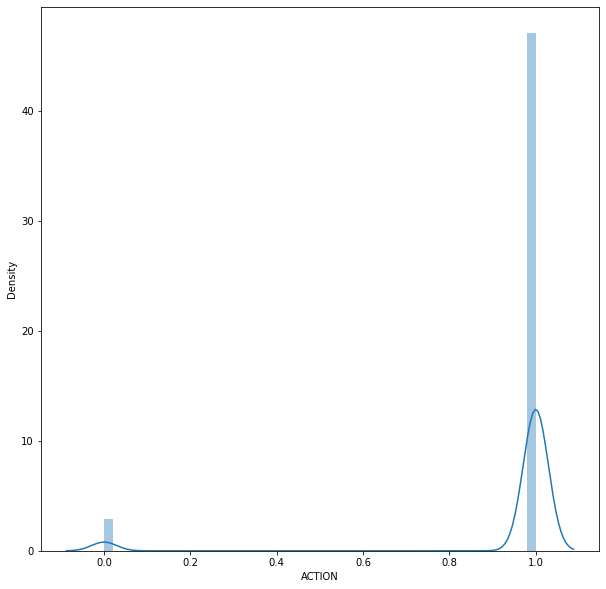

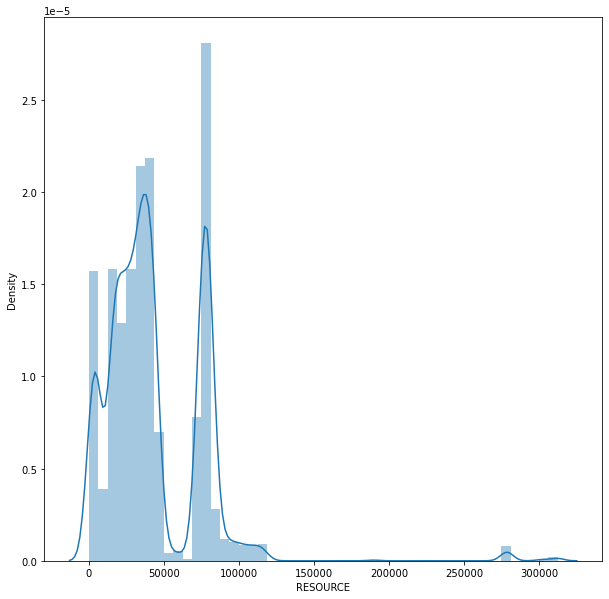

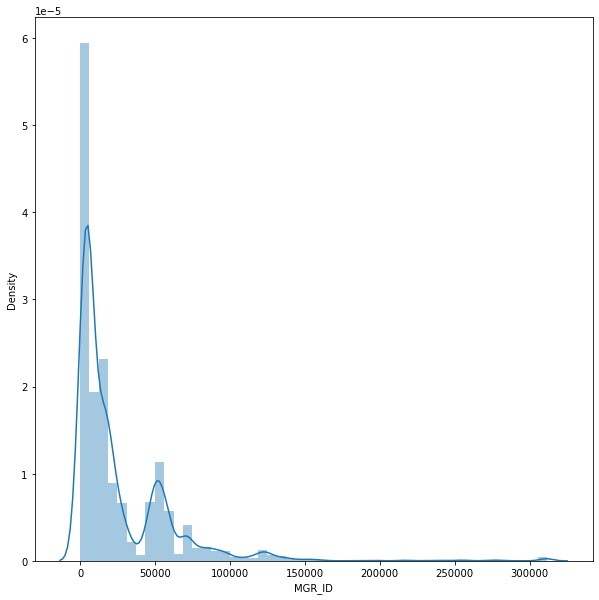

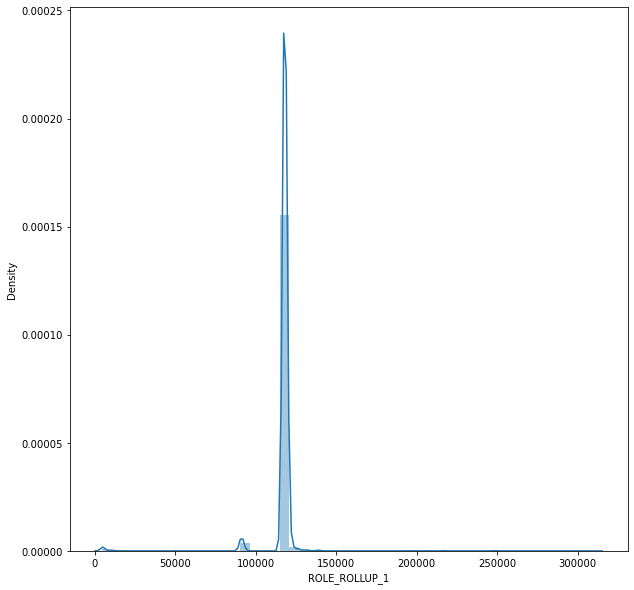

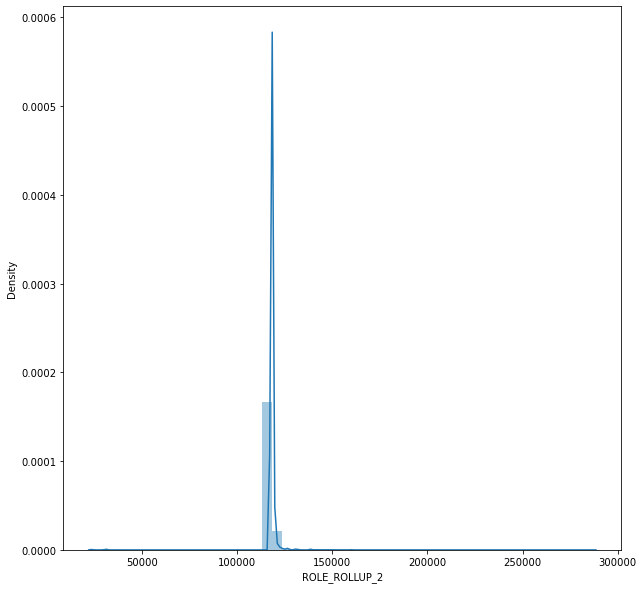

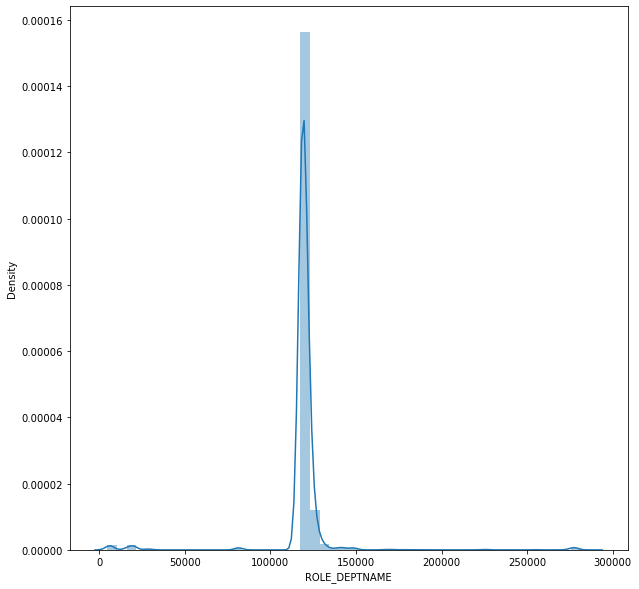

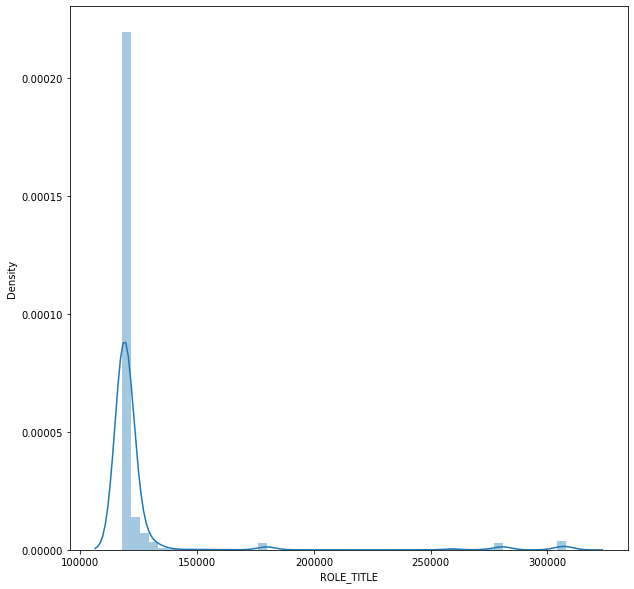

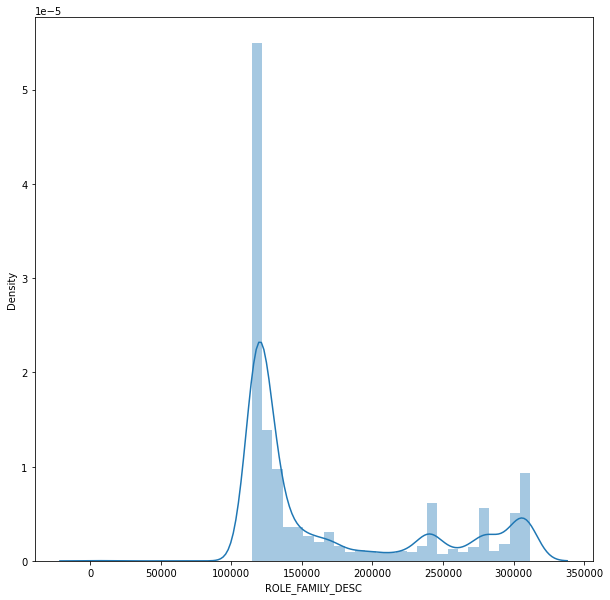

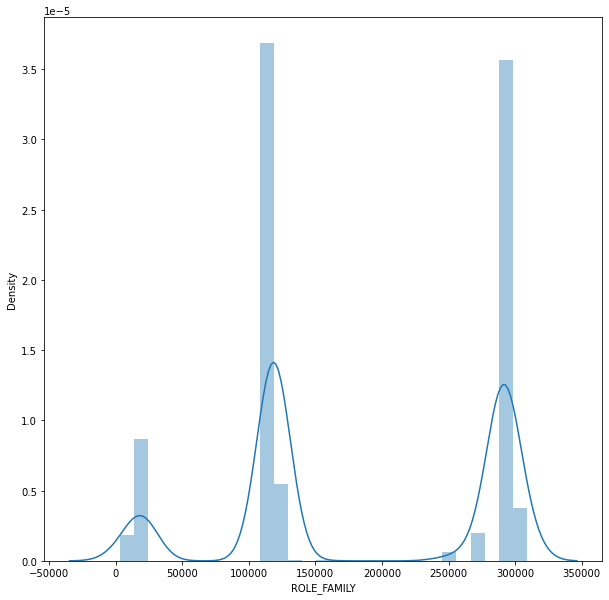

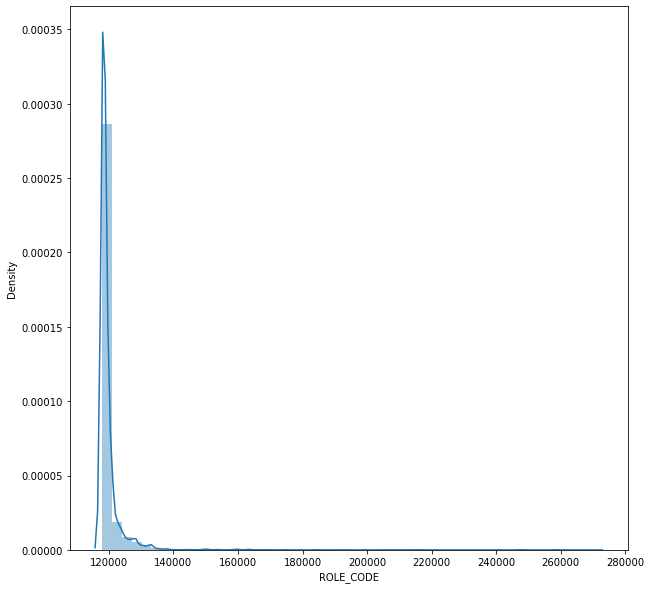

In [7]:
for i in traindf.describe().columns:
    plt.figure(figsize = (10,10))
    sns.distplot(traindf[i])
    

In [8]:
traindf.apply(lambda x: len(x.unique()))


ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

#### Boxplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

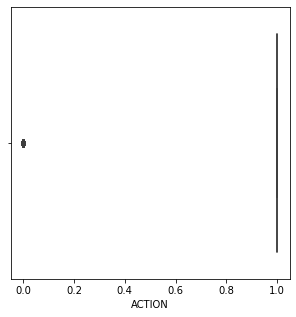

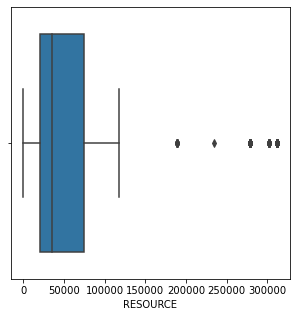

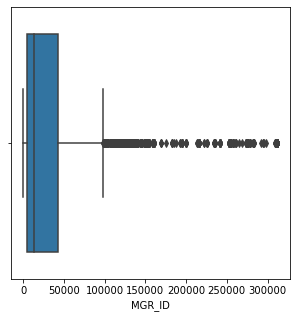

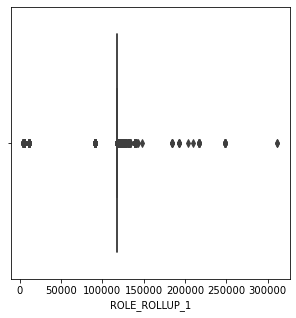

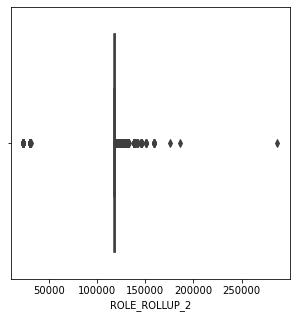

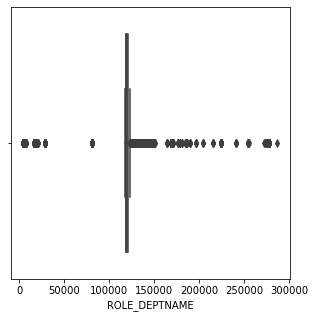

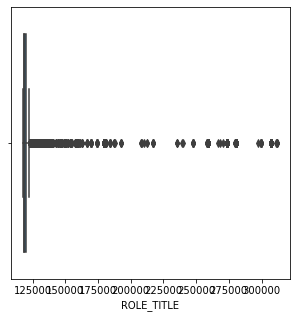

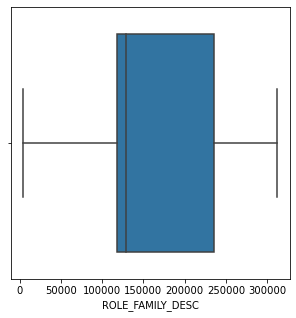

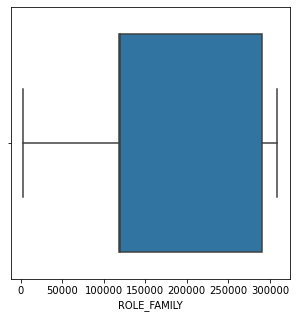

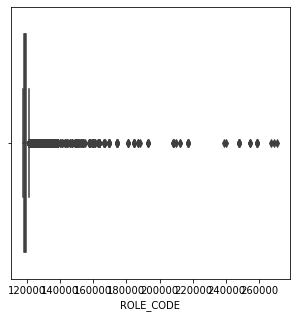

In [9]:
for i in traindf.describe().columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(traindf[i].dropna())

#### Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

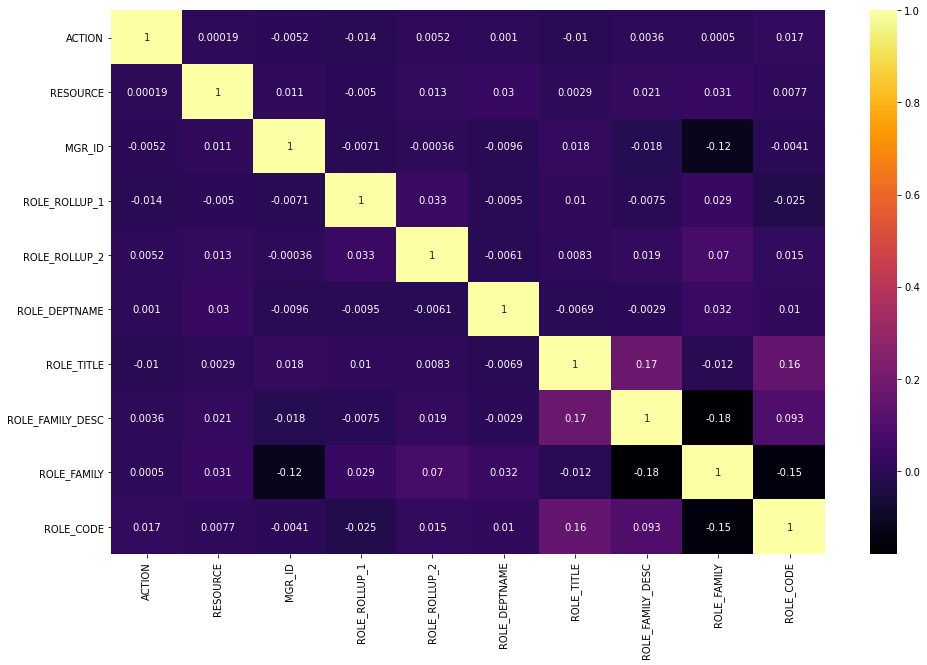

In [10]:
plt.figure(figsize = (16,10))
sns.heatmap(traindf.corr(), annot = True, cmap = 'inferno')

no significant correlation spotted

# Model Building

In [11]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [12]:
X = traindf.drop('ACTION', axis = 1)
y = traindf['ACTION']

In [13]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [14]:
X_test = testdf.drop('id', axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.25, random_state = 1)

## CatBoost

In [18]:
%%time
from catboost import CatBoostClassifier

parameters = {'loss_function' :'Logloss',
              'eval_metric' : 'AUC',
              'verbose' : 250,
              'random_seed' : 1}


cat = CatBoostClassifier(**parameters) # double stars are mandatory to pass variable input 
#an argument with single asterisk (star) prefixed to it helps in receiving variable number of arguments from calling environment.
#argument with double asterisks (stars) is used in function definition when variable number of keyword arguments have to be passed to a function.


cat.fit(X_train,y_train,eval_set = (X_valid,y_valid), use_best_model = True);

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 9.14ms	remaining: 9.13s
250:	test: 0.8105665	best: 0.8106179 (248)	total: 1.68s	remaining: 5.01s
500:	test: 0.8277386	best: 0.8278763 (496)	total: 3.3s	remaining: 3.29s
750:	test: 0.8355878	best: 0.8359259 (741)	total: 4.96s	remaining: 1.64s
999:	test: 0.8391134	best: 0.8393624 (997)	total: 6.56s	remaining: 0us

bestTest = 0.839362362
bestIteration = 997

Shrink model to first 998 iterations.
Wall time: 6.66 s


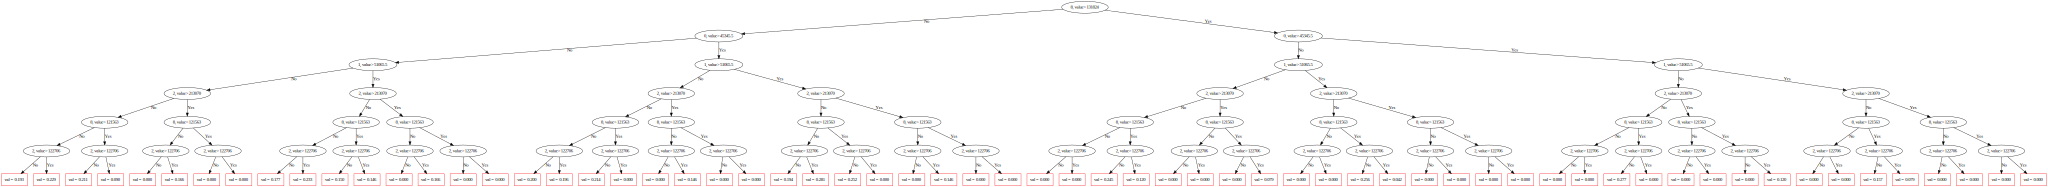

In [19]:
cat.plot_tree(tree_idx=0)

In [22]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [23]:
#%%time
#In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. We need to specify which features are categorical

categorical_features= list(range(X.shape[1]))




params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 30ms	remaining: 30s
200:	test: 0.8959353	best: 0.8959406 (199)	total: 12.1s	remaining: 48.2s
400:	test: 0.8985289	best: 0.8990341 (378)	total: 25.3s	remaining: 37.7s
600:	test: 0.8988958	best: 0.8996122 (493)	total: 38.8s	remaining: 25.8s
800:	test: 0.8999684	best: 0.9000746 (673)	total: 51.9s	remaining: 12.9s
999:	test: 0.8986113	best: 0.9002842 (846)	total: 1m 5s	remaining: 0us

bestTest = 0.9002841584
bestIteration = 846

Shrink model to first 847 iterations.


## Feature Importances

In [37]:
feature_imp=catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.045386
1,ROLE_DEPTNAME,16.372884
2,ROLE_ROLLUP_2,14.403366
3,MGR_ID,13.860962
4,ROLE_FAMILY_DESC,9.007865
5,ROLE_TITLE,8.923844
6,ROLE_ROLLUP_1,7.061676
7,ROLE_FAMILY,6.519062
8,ROLE_CODE,4.804955


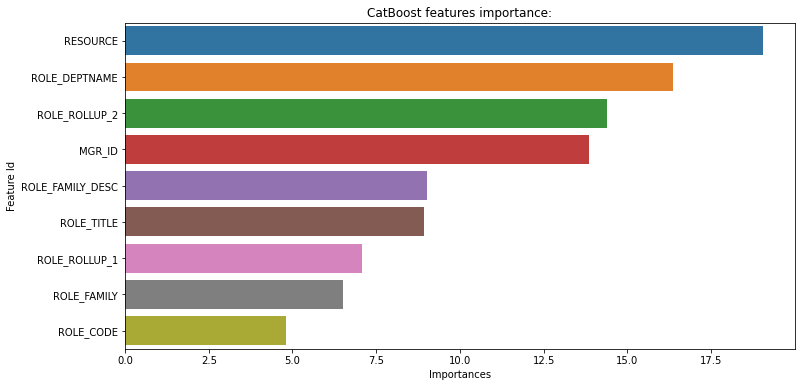

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp);
plt.title('CatBoost features importance:');

## Performance

In [39]:
print('Catboost model score is: {}%'.format(catmodel.score(X_valid,y_valid) * 100))

Catboost model score is: 95.63041620895886%


In [44]:
predict = catmodel.predict(X_valid)
predictdf = pd.DataFrame(predict)

<IPython.core.display.Javascript object>

In [46]:
predictdf.value_counts()

1    7924
0     269
dtype: int64

In [47]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

### We could have a problem due to data imbalance.We can fix this with oversampling.I will be using SMOTE method


In [55]:
from imblearn.over_sampling import SMOTE

X2 = traindf.drop('ACTION', axis = 1)
y2 = traindf['ACTION']

X_train2,X_valid2,y_train2,y_valid2 = train_test_split(X2,y2,test_size = 0.25, random_state = 1)

model = SMOTE(random_state = 1)
X_train2,y_train2 = model.fit_resample(X_train2,y_train2)
X_valid2,y_valid2 = model.fit_resample(X_valid2,y_valid2)

In [56]:
categorical_features= list(range(X.shape[1]))




params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train2, y_train2,
          eval_set=(X_valid2, y_valid2),
          use_best_model=True);

Learning rate set to 0.081709
0:	test: 0.9469316	best: 0.9469316 (0)	total: 47.7ms	remaining: 47.6s
200:	test: 0.9911259	best: 0.9911259 (200)	total: 21.7s	remaining: 1m 26s
400:	test: 0.9914834	best: 0.9915032 (393)	total: 45.2s	remaining: 1m 7s
600:	test: 0.9916451	best: 0.9916670 (568)	total: 1m 10s	remaining: 47s
800:	test: 0.9916468	best: 0.9916866 (755)	total: 1m 35s	remaining: 23.6s
999:	test: 0.9915168	best: 0.9917104 (844)	total: 1m 59s	remaining: 0us

bestTest = 0.9917103772
bestIteration = 844

Shrink model to first 845 iterations.


In [57]:
print('Catboost model score after SMOTE is: {}%'.format(catmodel.score(X_valid2,y_valid2) * 100))

Catboost model score after SMOTE is: 96.5653298835705%


In [60]:
predict2 = catmodel.predict(X_valid2)
predict2 = pd.DataFrame(predict2)
predict2.value_counts()

<IPython.core.display.Javascript object>

1    8003
0    7457
dtype: int64

# Conclusion

### The best model is the Catboost after using SMOTE.We got a whopping performance on training of ===> 96.56%